## Analysis stages:

Our analysis of the titanic dataset follows a sequence of stages:

1. Acquire the data.
2. Wrangle, prepare, cleanse the data.
3. Question or problem definition.
4. Analyze, identify patterns, and explore the data.
5. Question answer and conclusion.

## Acquire the data

In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

titanic = pd.read_csv('data/titanic_data.csv')
titanic.shape

(891, 12)

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

## Feature analysis

**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on [the Kaggle data page here](https://www.kaggle.com/c/titanic/data).

In [108]:
print(titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**data types for various features?**  

Helping us during converting goal.

In [109]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



  * 7 features are integer or floats
  * 5 features are strings (object).


**Catigorical features**

In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values.
[Wikipedia](https://en.wikipedia.org/wiki/Categorical_variable)

  * Categorical features: Survived, Pclass, Sex, Cabin, Embarked

**Numerical features**

Those values can be integers or floats.

  * Numerical features: Age, Fare, SibSp, Parch.
  
knowing which features are categorical or numerical helps us later to choose the suitable plot type.

**Mixed data types features**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

  * Ticket is a mix of numeric and alphanumeric data types.


In [110]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features contain blank, null or empty values?**  

These will require correcting.

In [111]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cabin > Age > Embarked** features contain a number of null values in that order for the training datase

## the distribution of numerical feature values?

In [112]:
titanic['Survived'] = titanic['Survived'].astype(str)
titanic['Pclass'] = titanic['Pclass'].astype(str)
sample_size = titanic.shape[0]

# How many passengers do not travel with parents or children (Parch = 0)
print('passengers with no parents nor children rate', titanic.loc[titanic['Parch'] == 0, 'Parch'].count() / sample_size)

# How many passengers travel with siblings or spouse
print('passengers with siblings or spouse', 1 - titanic.loc[titanic['SibSp'] == 0, 'Parch'].count() / sample_size)

titanic.describe()

passengers with no parents nor children rate 0.760942760943
passengers with siblings or spouse 0.317620650954


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* More than half of the passengers belong to Pclass 3 and the rest split into nearly 24 in Pclass 1 and 21% in Pclass 2

**Distribution of Ages**

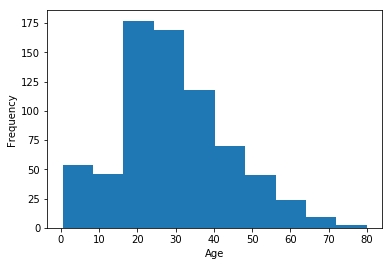

In [113]:
titanic['Age'].plot(kind='hist')
plt.xlabel('Age')

* Few elderly passengers (<1%) within age range 65-80.

**Distribution of Fares**

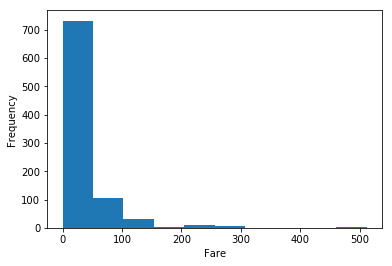

In [114]:
titanic['Fare'].plot(kind='hist')
plt.xlabel('Fare')

* Fares vary significtly with a standard deviation of 49.69 with very few passengers payings as high as $300

In [115]:
titanic.describe(include=['O'])

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,2,3,891,2,681,147,3
top,0,3,"Thayer, Mrs. John Borland (Marian Longstreth M...",male,1601,B96 B98,S
freq,549,491,1,577,7,4,644


* Around 38% (1 - 549/891) passengers survived representative of the actual survival rate at 32%.
* Around 65% (577/891) of passengers are males
* Ticket feature has high ratio (22%) of duplicate values (unique=681).
* Cabin values have several dupicates. Several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)

## Question definition

After getting some familiarity with the data. It's time to look for some insight.  
In the follwing sections of this notebook we are going to answer the below question:  

**Is there a strong correlation between `Pclass`, `Sex` and `Age` and the passenger ability to survive?**

## Data preparation

In order to answer our question we better start by cleaning and completing some features

** Dropping features **

In [116]:
titanic = titanic.drop(['Ticket', 'Cabin', 'PassengerId', 'Name', 'SibSp', 'Parch', 'Fare', 'Embarked'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


Now in order to be able to drive any meaningful correlation between Age and the ability to survive we need to fill the missing values.

One simple way to fill missing values for numerical continuous feature is to generate random numbers between the feature `mean` and `standard deviation`.

In [117]:
age_mean = titanic['Age'].mean()
age_std = titanic['Age'].std()

new_ages = []
for age in titanic['Age']:
    if np.isnan(age):
        random_age = np.abs(np.random.normal(age_mean, age_std, 1))
        new_ages.append(random_age)
    else:
        new_ages.append(age)

titanic['Age'] = new_ages
titanic.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22
1,1,1,female,38
2,1,3,female,26
3,1,1,female,35
4,0,3,male,35


## Age and survived correlation

A good approach is to split the `Age` feature into bands then compute the correlation with `survived`

In [118]:
titanic['Age'] = titanic['Age'].astype(int)
titanic['Survived'] = titanic['Survived'].astype(int)

titanic['AgeBand'] = pd.cut(titanic['Age'], 5)
titanic[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.522727
1,"(16, 32]",0.367901
2,"(32, 48]",0.343750
3,"(48, 64]",0.400000
4,"(64, 80]",0.153846


## Pclass and survived correlation

In [119]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Sex and survivied correlation

In [121]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Conclustion

Coming back to our questions:

**Is there a strong correlation between `Pclass`, `Sex` and `Age` and the passenger ability to survive?**

From the tables of correlations we draw above the answer is a clear **yess**

* More than half of the children survived (> 50%)
* More than 60% of passengers of Pclass 1 survived
* Around 75% of female survived

This notebook surves as good starting point to understand the titanic dataset, but still we can deeg deep and look at the other feature correlation with the ability to survive.

## Reference

[Titanic datascience solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)